# Kickstarter Data Exploration and Analysis
## Reilly Proudsworth
## Started 3/12/2018

**Data retrieved from https://www.kaggle.com/kemical/kickstarter-projects/data on 3/12/2018**

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
df = pd.read_csv('ks-projects-201801.csv')
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [48]:
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [49]:
df.describe(include=['O'])

,name,category,main_category,currency,deadline,launched,state,country
count,378657,378661,378661,378661,378661,378661,378661,378661
unique,375764,159,15,14,3164,378089,6,23
top,New EP/Music Development,Product Design,Film & Video,USD,2014-08-08,1970-01-01 01:00:00,failed,US
freq,41,22314,63585,295365,705,7,197719,292627


### What do we want to know?
**Is kickstarter success correllated to any specific feature?**

**Can we predict kickstarter success?**

### Work Objectives based on Data Exploration:
**Completing:**

None.  All columns that appear to be relevant are complete: no missing values

**Correcting:**

Name, ID, goal, pledged, and usd pledged can all be removed as they're either not related or duplicate information from other columns.  All dollar values will be from usd_pledged_real and usd_goal_real.

Look into launched dates from 1970/time before kickstarter existed (Wikipedia: April 28, 2009), determine if should be excluded.

Look into goals set arbitrarily low, determine if should be excluded.

Determine if kickstarters not categorized as either success/failed can be categorized into those two groups.

**Creating:**

Feature for differences in duration of campaign (deadline - launched).  We may want to band these results.

We may want to create a new feature for banded usd_goal_real.

**Classifying:**

We may want to explore if certain categories/sub-categoroies are more likely to succeed than others.

### Determine if old launched dates are valid Kickstarters  (correcting #2)

**We know from our data exploration so far that 7 Kickstarters were marked as launched in 1970, about 39 years before Kickstarter existed.  Are there other projects that were launched before the beginning of Kickstarter's era?  Should we include them or exclude them?**

In [50]:
df['launched'] = pd.to_datetime(df['launched'])

In [51]:
mask = df['launched'] <= pd.to_datetime('2009-4-28 0:00:00')
df[mask].shape

(12, 15)

In [52]:
df[mask].head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
2842,1014746686,Salt of the Earth: A Dead Sea Movie (Canceled),Film & Video,Film & Video,USD,2010-09-15,5000.0,1970-01-01 01:00:00,0.0,canceled,0,US,0.0,0.0,5000.0
48147,1245461087,1st Super-Size Painting - Social Network Owned...,Art,Art,USD,2010-08-14,15000.0,1970-01-01 01:00:00,0.0,canceled,0,US,0.0,0.0,15000.0
75397,1384087152,"""ICHOR"" (Canceled)",Film & Video,Film & Video,USD,2010-05-21,700.0,1970-01-01 01:00:00,0.0,canceled,0,US,0.0,0.0,700.0
94579,1480763647,"Support Solo Theater! Help ""Ungrateful Daughte...",Theater,Theater,USD,2010-06-01,4000.0,1970-01-01 01:00:00,0.0,canceled,0,US,0.0,0.0,4000.0
122662,1622952265,Pantshirts,Fashion,Fashion,USD,2009-05-26,1900.0,2009-04-27 14:10:39,387.0,failed,10,US,387.0,387.0,1900.0


In [53]:
df[mask].tail()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
247913,330942060,"Help RIZ Make A Charity Album: 8 Songs, 8 Caus...",Music,Music,USD,2010-05-04,10000.0,1970-01-01 01:00:00,0.0,canceled,0,US,0.0,0.0,10000.00
273779,462917959,Identity Communications Infographic (Canceled),Design,Design,USD,2010-04-10,500.0,1970-01-01 01:00:00,0.0,canceled,0,US,0.0,0.0,500.00
319002,69489148,Student Auditions Music 2015,Publishing,Publishing,CHF,2015-10-31,1900.0,1970-01-01 01:00:00,0.0,suspended,0,CH,0.0,0.0,1905.97
322000,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Shorts,Film & Video,USD,2009-07-20,80000.0,2009-04-23 00:07:53,22.0,failed,3,US,22.0,22.0,80000.00
325391,727286,Offline Wikipedia iPhone app,Software,Technology,USD,2009-07-14,99.0,2009-04-25 17:36:21,145.0,successful,25,US,145.0,145.0,99.00


**Considering there are only a dozen or so rows that fall into the launched before 4-28-09 window we could remove them without too much impact on the total data set, however there are a few that were launched right before the service went live and were both successes and failures.  Let's preserve them to use in our model.**

In [54]:
mask = df['launched'] <= pd.to_datetime('2009-4-01 0:00:00')
print(df[mask].shape)
fixed_df = df[~mask].copy()
print(fixed_df.shape)

(7, 15)
(378654, 15)


### Determining if a Kickstarter's goals are set abnormally low (Correcting #3)
**We can see in the data exploration done that the minimum goal set is 0.01 dollars.  How many projects were launched with very low goals?  Should we include them or exclude them?**

In [55]:
mask = df['usd_goal_real'] <= 1.00
print(df[mask].shape)

(373, 15)


**373 projects had goals of less than or equal to one dollar. 373 is about 0.001% of our data so any impact on the overall analysis and modelling will be small.**

### Determining if a Kickstarter Succeeded/Failed  (Correcting #4)
**Our data exploration has so far shown that we have more than just 2 states for a Kickstarter, successful and failed, there are also suspended, canceled, undefined, and live.  How many of each exist and should we categorize some into either the successful or failed buckets?  Should we exclude any of the states?**

In [56]:
fixed_df['state'].value_counts()

failed        197719
successful    133956
canceled       38773
undefined       3562
live            2799
suspended       1845
Name: state, dtype: int64

**So a not insignificant number of Kickstarters were canceled, suspended, or are still live.  Considering the dynamic nature of the live campaigns, we'll exclude those from our dataset so we can be sure about the outcome.**

In [57]:
mask = fixed_df['state'] == 'live'
fixed_df = fixed_df[~mask]
print(fixed_df['state'].value_counts())

failed        197719
successful    133956
canceled       38773
undefined       3562
suspended       1845
Name: state, dtype: int64


**If we define a successful kickstarter as one which the pledged amount meets or exceeds it's goal, would any of the canceled or suspended campaigns be included?**

(698, 15)
(292, 15)
(1654, 15)


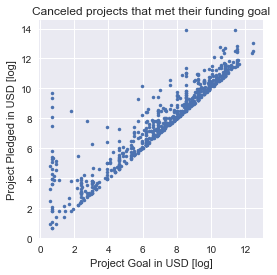

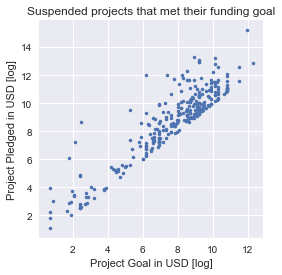

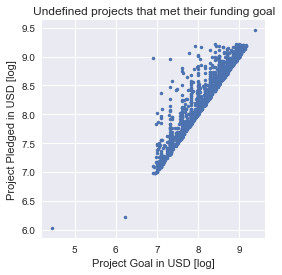

In [58]:
goal_log = np.log(fixed_df['usd_goal_real'] + 1)
pledged_log = np.log(fixed_df['usd_pledged_real'] + 1)
mask = pledged_log >= goal_log
temp_df = fixed_df[mask]

plt.figure(figsize=(4,4))
mask = temp_df['state'] == 'canceled'
cancel_df = temp_df[mask]
x = np.log(cancel_df['usd_goal_real'] + 1)
y = np.log(cancel_df['usd_pledged_real'] + 1)
print(cancel_df.shape)
plt.plot(x, y, marker='.', linestyle='none')
plt.title('Canceled projects that met their funding goal')
plt.xlabel('Project Goal in USD [log]')
plt.ylabel('Project Pledged in USD [log]')

plt.figure(figsize=(4,4))
mask = temp_df['state'] == 'suspended'
suspend_df = temp_df[mask]
x = np.log(suspend_df['usd_goal_real'] + 1)
y = np.log(suspend_df['usd_pledged_real'] + 1)
print(suspend_df.shape)
plt.plot(x, y, marker='.', linestyle='none')
plt.title('Suspended projects that met their funding goal')
plt.xlabel('Project Goal in USD [log]')
plt.ylabel('Project Pledged in USD [log]')

plt.figure(figsize=(4,4))
mask = temp_df['state'] == 'undefined'
undefined_df = temp_df[mask]
x = np.log(undefined_df['usd_goal_real'] + 1)
y = np.log(undefined_df['usd_pledged_real'] + 1)
print(undefined_df.shape)
plt.plot(x, y, marker='.', linestyle='none')
plt.title('Undefined projects that met their funding goal')
plt.xlabel('Project Goal in USD [log]')
plt.ylabel('Project Pledged in USD [log]')

plt.show()

**We can clearly see that some projects had enough funding, but were marked cancelled/suspended/undefined for some reason.  Once again for clarity: if we assume the goal of Kickstarter is to get enough funding, let's include the projects that achieved the goal regardless of outcome as successful kickstarters and the projects that didn't have enough funding as failed for our analysis.  We'll jump ahead a step and convert successful and failed into 1 and 0, respectfully.**

In [59]:
fixed_df.loc[pledged_log >= goal_log, 'state'] = 1
fixed_df.loc[pledged_log < goal_log, 'state'] = 0
fixed_df['state'] = pd.to_numeric(fixed_df['state'])
print(fixed_df['state'].value_counts())
fixed_df.head()

0    239254
1    136601
Name: state, dtype: int64


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,0,14,US,1283.0,1283.0,19500.00


### Engineering campaign length feature (Creating #1):

In [60]:
fixed_df['campaign_length'] = pd.to_datetime(fixed_df['deadline']) - pd.to_datetime(fixed_df['launched'])
fixed_df['campaign_length'] = fixed_df['campaign_length'].astype('timedelta64[D]')
fixed_df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,campaign_length
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,0,GB,0.0,0.0,1533.95,58.0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,15,US,100.0,2421.0,30000.00,59.0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,3,US,220.0,220.0,45000.00,44.0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,1,US,1.0,1.0,5000.00,29.0
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,0,14,US,1283.0,1283.0,19500.00,55.0


### Correllation by pivoting features against each other:

In [61]:
temp_df = fixed_df.drop(['ID', 'name', 'deadline', 'goal', 'launched', 'pledged', 'usd pledged', 'usd_pledged_real', \
                        'usd_goal_real', 'state'], axis=1)
for name in temp_df.columns:
    print(fixed_df[[name, 'state']].groupby(name, as_index=False).mean().sort_values(by='state', ascending=False))

               category     state
21             Chiptune  0.771429
122         Residencies  0.724638
6           Anthologies  0.673548
36                Dance  0.665516
81          Letterpress  0.645833
72           Indie Rock  0.641616
30       Country & Folk  0.634702
23      Classical Music  0.634128
141             Theater  0.625993
99         Performances  0.620278
144          Typography  0.603774
75                 Jazz  0.601524
25          Comic Books  0.597048
107               Plays  0.590609
136      Tabletop Games  0.565804
83      Literary Spaces  0.565217
152           Webcomics  0.557453
66       Graphic Novels  0.549051
53            Festivals  0.546651
129              Shorts  0.542848
70         Illustration  0.522974
125                Rock  0.521481
71            Immersive  0.515244
11            Art Books  0.510910
92              Musical  0.509372
114          Public Art  0.504560
26               Comics  0.504116
90                Music  0.494823
73        Inst

**Interesting things to note:  Dance, Theater, and Comics are the top main_categories.  Of the categories Chiptune, Residencies, and Anthologies are the most successful.  We see a mysterious country marked as 'N,0"' that has a high rate of success; we may want to investigate where that is and see if we can correct it's label.  It seems like a campaign length of about 1 month works best, we can band these values and investigate further.  A big point to investigate is that 0 backers doesn't show zero correllation...  A project needs to have backers to succeed, so a project with 0 backers should NEVER succeed.**

### Investigating the mysterious ' N,0" '... (Correcting #5):

In [62]:
mask = fixed_df['country'] == 'N,0"'
temp_df = fixed_df[mask]
print(temp_df.shape)
temp_df.head()

(3796, 16)


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,campaign_length
169,1000694855,STREETFIGHTERZ WHEELIE MURICA,Film & Video,Film & Video,USD,2014-09-20,6500.0,2014-08-06 21:28:36,555.00,0,0,"N,0""",NaN,555.00,6500.00,44.0
328,100149523,Duncan Woods - Chameleon EP,Music,Music,AUD,2015-08-25,4500.0,2015-08-04 12:05:17,4767.00,1,0,"N,0""",NaN,3402.08,3211.53,20.0
632,1003023003,The Making of Ashley Kelley's Debut Album,Music,Music,USD,2015-04-09,3500.0,2015-03-10 20:06:13,3576.00,1,0,"N,0""",NaN,3576.00,3500.00,29.0
647,1003130892,Butter Side Down Debut Album,Music,Music,USD,2015-11-26,6000.0,2015-11-02 22:09:19,7007.80,1,0,"N,0""",NaN,7007.80,6000.00,23.0
749,1003629045,Chase Goehring debut EP,Music,Music,USD,2016-03-21,3000.0,2016-02-23 03:09:49,3660.38,1,0,"N,0""",NaN,3660.38,3000.00,26.0


**This mysterious country is about 1% of our data and looks to be gibberish, possibly a bad transcription or some other bug.  We also see all of the backers in this country are 0, even for projects that succeeded. Maybe that's the cause of the weirdness of the country?**

In [65]:
temp_mask = fixed_df['backers'] == 0
zero_df = fixed_df[temp_mask]
zero_df.shape

(55053, 16)

**Clearly there are lots of projects with 0 backers and only some have a gibberish country.  We'll fix the country feature first then investigate the number of projects that have no backers and are still marked successful.**

In [66]:
temp_df['currency'].value_counts()

USD    2737
GBP     460
CAD     206
EUR     186
AUD     111
SEK      31
NZD      28
DKK      16
NOK      14
CHF       7
Name: currency, dtype: int64

In [67]:
fixed_df.loc[(fixed_df['currency'] == 'USD'), 'country'] = 'US'
fixed_df.loc[(fixed_df['currency'] == 'GBP'), 'country'] = 'GB'
fixed_df.loc[(fixed_df['currency'] == 'CAD'), 'country'] = 'CA'
fixed_df.loc[(fixed_df['currency'] == 'EUR'), 'country'] = 'FR'
fixed_df.loc[(fixed_df['currency'] == 'AUD'), 'country'] = 'AU'
fixed_df.loc[(fixed_df['currency'] == 'SEK'), 'country'] = 'SE'
fixed_df.loc[(fixed_df['currency'] == 'NZD'), 'country'] = 'NZ'
fixed_df.loc[(fixed_df['currency'] == 'DKK'), 'country'] = 'DK'
fixed_df.loc[(fixed_df['currency'] == 'NOK'), 'country'] = 'NO'
fixed_df.loc[(fixed_df['currency'] == 'CHF'), 'country'] = 'CH'

In [69]:
mask = fixed_df['country'] == 'N,0"'
temp_df = fixed_df[mask]
print(temp_df.shape)

(0, 16)


**Now let's investigate the 0 backers with successful campaigns issue.**

In [70]:
temp_mask = fixed_df['backers'] == 0
zero_df = fixed_df[temp_mask]
mask = zero_df['usd_pledged_real'] > 0
zero_df = zero_df[mask]
print(zero_df.shape)
zero_df.head()

(3082, 16)


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,campaign_length
169,1000694855,STREETFIGHTERZ WHEELIE MURICA,Film & Video,Film & Video,USD,2014-09-20,6500.0,2014-08-06 21:28:36,555.00,0,0,US,NaN,555.00,6500.00,44.0
328,100149523,Duncan Woods - Chameleon EP,Music,Music,AUD,2015-08-25,4500.0,2015-08-04 12:05:17,4767.00,1,0,AU,NaN,3402.08,3211.53,20.0
632,1003023003,The Making of Ashley Kelley's Debut Album,Music,Music,USD,2015-04-09,3500.0,2015-03-10 20:06:13,3576.00,1,0,US,NaN,3576.00,3500.00,29.0
647,1003130892,Butter Side Down Debut Album,Music,Music,USD,2015-11-26,6000.0,2015-11-02 22:09:19,7007.80,1,0,US,NaN,7007.80,6000.00,23.0
749,1003629045,Chase Goehring debut EP,Music,Music,USD,2016-03-21,3000.0,2016-02-23 03:09:49,3660.38,1,0,US,NaN,3660.38,3000.00,26.0


**So again about 1% of our data has campaigns with pledges, but no backers.  How should we fill in the missing values?  Let's